In [1]:
import numpy as np
import pandas as pd
import dlomix
from dlomix import constants, data, eval, layers, models, pipelines, reports, utils
from dlomix.models import PrositIntensityPredictor
from dlomix.losses import masked_spectral_distance, masked_pearson_correlation_distance
import tensorflow as tf
import wandb
from wandb.keras import WandbCallback
print([x for x in dir(dlomix) if not x.startswith("_")])

2023-11-22 22:30:39.819580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 22:30:40.685099: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 22:30:45.690965: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-22 22:30:45.691155: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

['META_DATA', 'constants', 'data', 'eval', 'layers', 'losses', 'models', 'pipelines', 'reports', 'utils']


In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [85]:
def peptide_length_countplot(df):
    fig, ax = plt.subplots(figsize=(6,4))
    sns.set(style="white")
    sns.countplot(x='peptide_length', data=df, color='#337ab7')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xlabel("Peptide Length", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

In [23]:
df = pd.read_parquet("/cmnfs/proj/prosit/Transformer/first_pool_test.parquet")
df = df[df.mass_analyzer == "FTMS"]

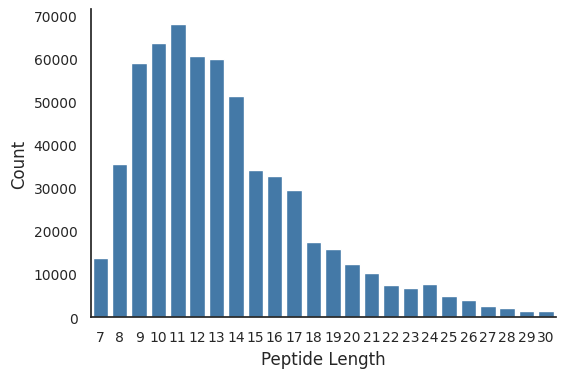

In [87]:
peptide_length_countplot(df)

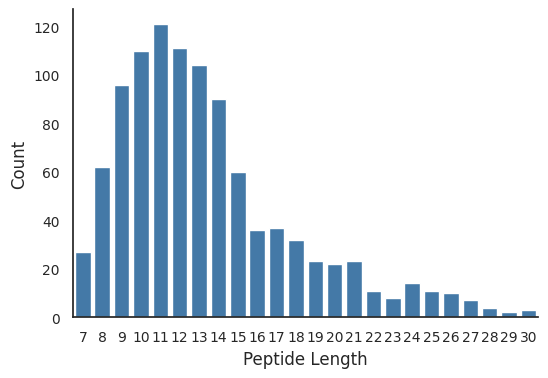

In [94]:
peptide_length_countplot(df.iloc[1024*7:1024*8])

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns